1. 목표

  + Iris 데이터를 싸이킷런을 이용하여 데이터를 분석한다.
  + 지도학습을 통해 정확도, 결정경계, 특성 중요도를 출력한다.
  + 비지도학습을 통해 성분을 분석하고 산점도를 그린다.

a. 데이터 분석에 필요한 library를 import한다.

    numpy
    matplotlib
    pandas

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

b. iris 데이터를 불러오고 x_label과 y_label을 지정한다.

    load_iris
    feature: iris.data
    target: iris.target

In [44]:
from sklearn.datasets import load_iris

iris = load_iris()
# print(iris)

feature = iris.data
target = iris.target

# print(feature)
# print(target)

2. 전처리

  + pandas를 이용하여 결측치를 확인한다. 결측치가 있다면 제거한다.
  + standard-scaler(zscore)을 이용하여 전처리를 진행한다.

a. 결측치

    pandas
    isna

In [45]:
# False => 이상치가 없음을 확인
isna_iris = pd.isna(iris)
print(isna_iris)

False


b. 전처리

    StandardScaler
    fit_transform

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_scale = scaler.fit_transform(feature)
# print(feature_scale)

3. 지도학습

  + 데이터셋을 train과 test로 분리한다.
  + RandomForest를 이용하여 학습시킨다.
  + 학습 결과를 확인하고 정확도, 결정경계, 특성 중요도를 출력한다.

a. Iris를 train과 test 데이터로 분리

    train_test_split

In [47]:
from sklearn.model_selection import train_test_split

x, y = feature, target

x_train, x_test, y_train, y_test = train_test_split(feature_scale, target, test_size=0.2, random_state=42)

# train 데이터와 test 데이터의 크기 확인
print("Train 데이터의 개수:", len(x_train))
print("Test 데이터의 개수:", len(x_test))

Train 데이터의 개수: 120
Test 데이터의 개수: 30


b. RandomForest에 필요한 library를 import한다.

    RandomForestClassifier
    train_test
    accuracy_score

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

c. RandomForest 모듈를 만들기 위한 작업을 진행한다.

  + RandomForestClassifier을 통해 모델을 학습시킨다.
  + fit 함수를 통해 모델의 형태를 반환시킨다.

In [49]:
# RandomForest 학습
rf_model = RandomForestClassifier()
# 모델 반환
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
# test 데이터 예측
predictions = rf_model.predict(x_test)
# print(predictions)

d. 학습된 모델에 test 데이터를 적용시킨다. 이후 출력하고자 하는 정보를 함수를 이용하여 얻는다.

    accuracy_score
    scatter
    importances

In [51]:
# 정확도
print("train Accuracy: {:.3f}".format(rf_model.score(x_train, y_train)))
print("test Accuracy: {:.3f}".format(rf_model.score(x_test, y_test)))

train Accuracy: 1.000
test Accuracy: 1.000


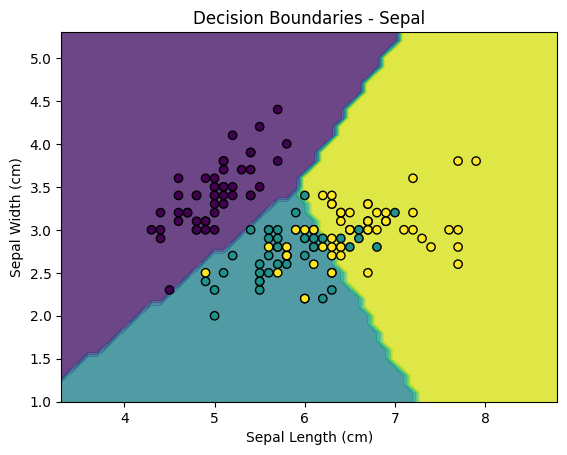

In [52]:
# 결정경계를 측정하기 위해 2개의 feature을 설정 (꽃받침 길이, 너비)
selected_features = [0, 1]
x_selected = x[:, selected_features]

# 연속형 데이터 => 로지스틱 회귀분석 이용
lr_model = LogisticRegression()
lr_model.fit(x_selected, y)

# grid 범위 지정
x_min, x_max = x_selected[:, 0].min() - 1, x_selected[:, 0].max() + 1
y_min, y_max = x_selected[:, 1].min() - 1, x_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# model 예측
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot 그리기
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x_selected[:, 0], x_selected[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Boundaries - Sepal')
plt.show()


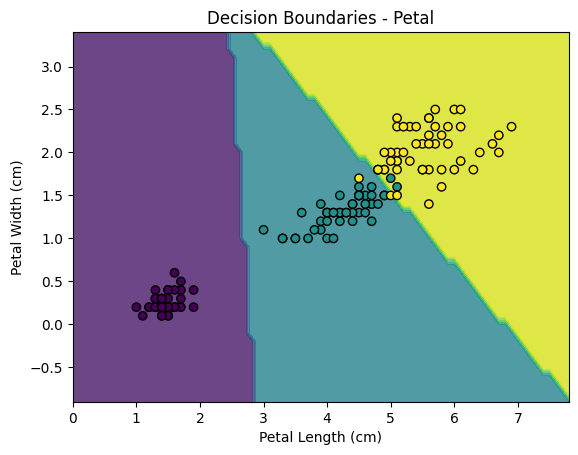

In [53]:
# 결정경계를 측정하기 위해 2개의 feature을 설정 (꽃잎 길이, 너비)
selected_features = [2, 3]
x_selected = x[:, selected_features]

# 연속형 데이터 => 로지스틱 회귀분석 이용
lr_model = LogisticRegression()
lr_model.fit(x_selected, y)

# grid 범위 지정
x_min, x_max = x_selected[:, 0].min() - 1, x_selected[:, 0].max() + 1
y_min, y_max = x_selected[:, 1].min() - 1, x_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# model 예측
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot 그리기
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x_selected[:, 0], x_selected[:, 1], c=y, edgecolors='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundaries - Petal')
plt.show()


Feature 3: 0.4761422063545874
Feature 4: 0.4002346333938383
Feature 1: 0.08880322933198842
Feature 2: 0.03481993091958585


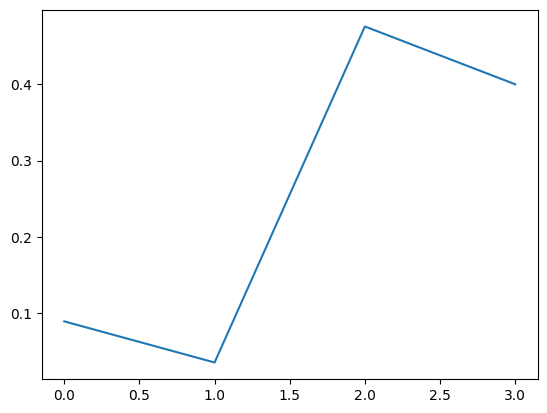

In [54]:
# 중요도
feature_importance = rf_model.feature_importances_

# 중요도가 높은 순서로 정렬
sorted_idx = np.argsort(feature_importance)[::-1]

# Feature 이름과 값 출력
for i in sorted_idx:
    print(f"Feature {i+1}: {feature_importance[i]}")

plt.plot(feature_importance)

4. 비지도학습

  + 주성분 분석(PCA)를 적용해본다.
  + 비음수 행렬 분해(NMF)를 적용해본다.
  + 결과(성분)을 출력하여 산점도를 작성한다.

a. PCA, NMF에 필요한 library를 import한다.

    PCA
    NMF

In [55]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

b. 주성분 분석 적용

    PCA
    scatter

In [56]:
# 주성분 개수를 2개로 설정
pca = PCA(n_components=2)
# 앞서 했던 전처리한 scale을 이용하여 PCA 적용
pca_result = pca.fit_transform(feature_scale)

# print(pca_result)

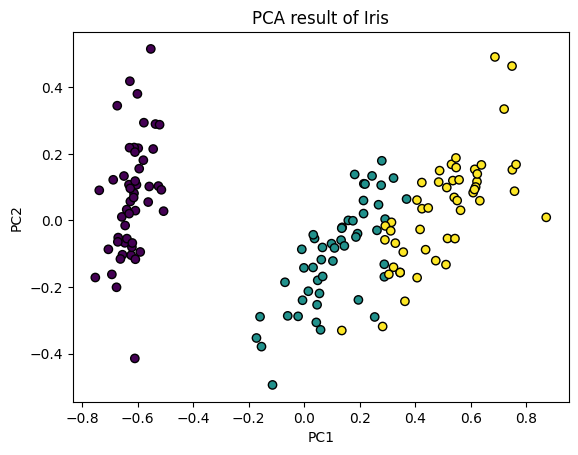

In [57]:
# 주성분 분석 결과 시각화
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target, edgecolor='k', cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA result of Iris')
plt.show()

c. 비음수 행렬 분해

    NMF
    scatter

In [61]:
# 생각해보니 NMF는 음수를 사용할 수가 없었다.
# 따라서 scaler를 standard에서 min-max로 수정하였다.
nmf = NMF(n_components=2, max_iter=1000)
nmf_result = nmf.fit_transform(feature_scale)

# print(nmf_result)

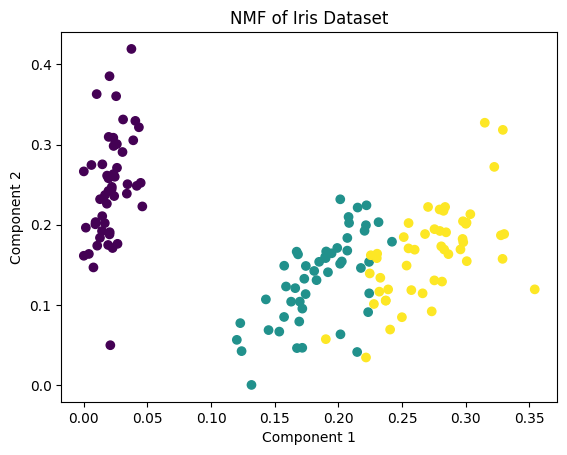

In [62]:
# 비음수 행렬 분해 결과 시각화
plt.scatter(nmf_result[:, 0], nmf_result[:, 1], c=target, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('NMF of Iris Dataset')
plt.show()